# Анализ аренды велосипедов

Задачи:
+ Изучить динамику числа аренд велосипедов Лондона, наличие связи с погодными условиями и выходными
+ Объяснить несколько аномалий на графике

## Описание данных

+ timestamp – дата и время (точность до часа)
+ cnt – количество аренд велосипедов за этот час
+ t1 – температура, в С
+ t2 – температура "ощущается как", в С 
+ hum – влажность (%)
+ wind_speed – скорость ветра, км/ч
+ weather_code – погодные условия:
     + 1 – ясно (SKC)
     + 2 – преимущественно ясно / встречаются отдельные облака (SCT)
     + 3 – облачно / значительные облака (BKN)
     + 4 – пасмурно (OVC)
     + 7 – небольшой дождь Rain/ light Rain shower/ Light rain 
     + 10 – дождь с грозой
     + 26 – снегопад 
     + 94 – ледяной туман (да, такое бывает!)
+ isholiday – является ли день праздником (1 – праздник, 0 – нет)
+ isweekend –  является ли день выходным (1 – выходной, 0 – нет)
+ season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

In [2]:
df = pd.read_csv('C:/Users/пк/Dolzhenkov_Jupyter/Statistics/Lesson_3/london.csv')

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


## Первичный анализ данных


In [4]:
# Обзор данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
# Измненение формата данных
df['timestamp'] = pd.to_datetime(df.timestamp)
df[['weather_code','is_holiday','is_weekend','season']] = df[['weather_code','is_holiday','is_weekend','season']].astype('uint16')
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code            uint16
is_holiday              uint16
is_weekend              uint16
season                  uint16
dtype: object

In [6]:
df.head(15)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1,0,1,3
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4,0,1,3
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4,0,1,3
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4,0,1,3
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3,0,1,3


<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

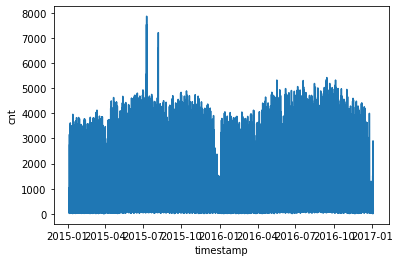

In [7]:
#посмотрим на число поездок по датам и времени
sns.lineplot(data=df, x="timestamp", y="cnt")

Text(0, 0.5, 'Кол-во аренд велосипедов')

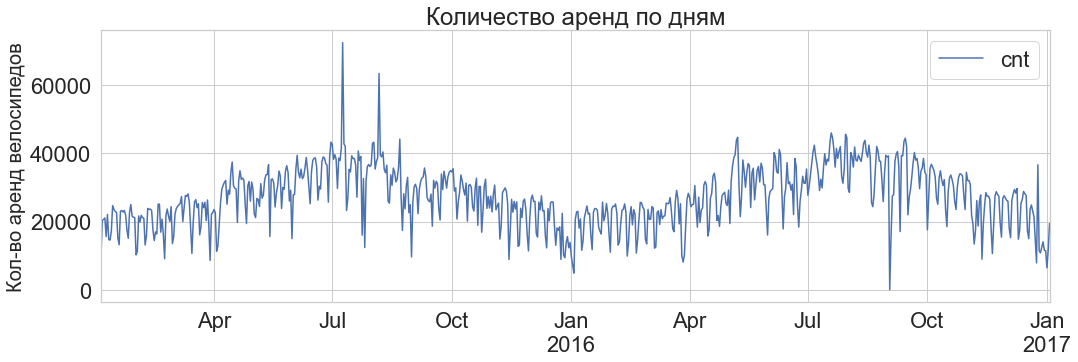

In [8]:
# Преобразуем данные, посчитаем количество аренд по дням с помощью метода RESAMPLE

sns.set(font_scale = 2,
        style      = 'whitegrid',
        rc         = {'figure.figsize':(17,5)})

ax = df.sort_values(by='timestamp')[['cnt']].set_index(df.timestamp).resample(rule='D').sum().plot()

ax.set_title('Количество аренд по дням')

ax.set_xlabel('')
ax.set_ylabel('Кол-во аренд велосипедов', fontsize = 20)



## Анализ аномалий на графике

In [9]:
df_days = df.sort_values(by='timestamp')[['cnt']].set_index(df.timestamp).resample(rule='D').sum()
df_days

,cnt
timestamp,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601
...,...
2016-12-30,11566
2016-12-31,11424
2017-01-01,6421


### 1. Найдем Скользящее среднее(SMA, окно = 3)

In [10]:
df_days['rolling_cnt'] = df_days.cnt.rolling(window=3).mean()
df_days = df_days.reset_index()
df_days.head()

,timestamp,cnt,rolling_cnt
0,2015-01-04,9234,NaN
1,2015-01-05,20372,NaN
2,2015-01-06,20613,16739.666667
3,2015-01-07,21064,20683.000000
4,2015-01-08,15601,19092.666667


### 2. Найдем разницу между наблюдаемыми и подсчитанными значениями. Расчет Стандартного отклонения



In [11]:
df_days['diff_values'] = df_days.cnt - df_days.rolling_cnt
df_days.head()

,timestamp,cnt,rolling_cnt,diff_values
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,16739.666667,3873.333333
3,2015-01-07,21064,20683.000000,381.000000
4,2015-01-08,15601,19092.666667,-3491.666667


In [12]:
std = np.std(df_days.diff_values)
std

# второй способ
# df_days.diff_values.std(ddof=0)

4558.586641117938

In [13]:
# определим границы 99% границ интервалов для скользящего среднего

df_days['upper_bound'] = df_days.rolling_cnt + 2.576*std
df_days['lower_bound'] = df_days.rolling_cnt - 2.576*std
df_days.tail()

,timestamp,cnt,rolling_cnt,diff_values,upper_bound,lower_bound
726,2016-12-30,11566,12682.000000,-1116.000000,24424.919188,939.080812
727,2016-12-31,11424,12347.333333,-923.333333,24090.252521,604.414146
728,2017-01-01,6421,9803.666667,-3382.666667,21546.585854,-1939.252521
729,2017-01-02,11823,9889.333333,1933.666667,21632.252521,-1853.585854
730,2017-01-03,19436,12560.000000,6876.000000,24302.919188,817.080812


In [14]:
# Отеберем наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала
df_days.query('cnt > upper_bound')

,timestamp,cnt,rolling_cnt,diff_values,upper_bound,lower_bound
186,2015-07-09,72504,50705.000000,21799.000000,62447.919188,38962.080812
214,2015-08-06,63468,46627.333333,16840.666667,58370.252521,34884.414146
609,2016-09-04,27512,14259.000000,13253.000000,26001.919188,2516.080812
721,2016-12-25,36653,19650.666667,17002.333333,31393.585854,7907.747479


### 3. Анализ причин дня с максимальной арендой (2015-07-09)

In [15]:
df.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1,0,1,3
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4,0,1,3
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4,0,1,3
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4,0,1,3
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3,0,1,3


In [16]:
df.shape

(17414, 10)

In [17]:
# Проверяем на дублирование. Делаем вывод, что нет дублирования
df.nunique()

timestamp       17414
cnt              3781
t1                 73
t2                 82
hum               143
wind_speed        103
weather_code        7
is_holiday          2
is_weekend          2
season              4
dtype: int64

In [18]:
# Исходя из данных можно сделать вывод, что в данных нет информации о причинах аномалии
# Если посмотреть в интернете, то станет понятно, что в этот день в Лондоне была забастовка в метро

df.query('timestamp.dt.round("D") > "2015-07-08" & timestamp.dt.round("D") < "2015-07-11"')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
4442,2015-07-08 13:00:00,1289,19.5,19.5,66.5,17.5,7,0,0,1
4443,2015-07-08 14:00:00,1451,19.5,19.5,64.0,26.0,7,0,0,1
4444,2015-07-08 15:00:00,1749,20.0,20.0,58.5,25.0,2,0,0,1
4445,2015-07-08 16:00:00,2839,19.5,19.5,66.0,29.5,3,0,0,1
4446,2015-07-08 17:00:00,5560,20.0,20.0,53.0,30.0,2,0,0,1
4447,2015-07-08 18:00:00,4721,20.0,20.0,49.0,26.0,2,0,0,1
4448,2015-07-08 19:00:00,3313,20.0,20.0,44.5,24.0,1,0,0,1
4449,2015-07-08 20:00:00,2243,19.0,19.0,47.5,19.5,1,0,0,1
4450,2015-07-08 21:00:00,1614,18.0,18.0,49.0,17.0,2,0,0,1
4451,2015-07-08 22:00:00,1143,17.0,17.0,52.0,16.0,1,0,0,1


### 3. Анализ причин дня с минимальной арендой (2016-09-02)

In [19]:
# Отеберем наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала
df_days.query('cnt < lower_bound')

,timestamp,cnt,rolling_cnt,diff_values,upper_bound,lower_bound
130,2015-05-14,15609,28709.333333,-13100.333333,40452.252521,16966.414146
189,2015-07-12,23240,36036.666667,-12796.666667,47779.585854,24293.747479
201,2015-07-24,16034,31013.666667,-14979.666667,42756.585854,19270.747479
232,2015-08-24,17400,29529.333333,-12129.333333,41272.252521,17786.414146
314,2015-11-14,8898,21037.333333,-12139.333333,32780.252521,9294.414146
607,2016-09-02,0,26086.333333,-26086.333333,37829.252521,14343.414146
615,2016-09-10,17080,31262.000000,-14182.000000,43004.919188,19519.080812
621,2016-09-16,21967,36193.333333,-14226.333333,47936.252521,24450.414146
678,2016-11-12,8990,20878.000000,-11888.000000,32620.919188,9135.080812


In [20]:
# Можно сделать вывод, что 2016-09-02была ошибка при сборе данных